<a href="https://colab.research.google.com/github/pontofio/Cours/blob/main/Copie_de_Notebook_2_Arbres_BreastCancer_Etudiant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 Arbres de Décision – Breast Cancer
👨‍🏫 Professeur : Khalil HADDAOUI

**Problème concret** : triage de dossiers médicaux (priorité).  
**Objectifs** : construire un arbre interprétable, régler la complexité, choisir des métriques adaptées (Recall, ROC-AUC).


## 🧭 Idée
On **découpe l'espace** des features par questions binaires jusqu'à obtenir des feuilles presque pures.

### Impureté de Gini
$$
G=1-\sum_{k=1}^K p_k^2
$$
ou
$$ Entropie = -\sum_k p_k \log p_k
$$

L'indice de Gini mesure l'inégalité ou la séparation entre deux classes.

Plus ça valeur est grande plus le modele va discriminer bien entre le positif et le négatif

Quand AUC < 0.5 indice de Gini négatif donc il fait pire que du hazard il inverse les classe.

AUC compris entre 0 et 1, c'est l'air compris sous la courbe ROC.

Avoir un AUC de 0.5 modele aléatoire donc pas d'information. entre 0.7 et 0.8 model correcte, entre 0.8 et 0.9 modele de classification bon et audessus excellent

Entropie c'est une mesure, et donc c'est positif et avec le log et tout là il faut mettre la négation

### Métriques adaptées
- **Recall** élevé en santé (réduire FN) ; ajuster le **seuil**.
- Suivre **Precision** pour éviter trop de fausses alertes (FP).
- **ROC-AUC** pour comparaison globale des classifieurs.


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# TODO: Arbre simple + grid petite sur profondeur/min_samples_leaf
pipe = Pipeline([("tree", DecisionTreeClassifier(random_state=42))])
param_grid = {
    "tree__criterion": ["gini", "entropy"],
    "tree__max_depth": [3, 5, None],
    "tree__min_samples_leaf": [1, 5, 10]
}
gs = GridSearchCV(pipe, param_grid, cv=5, scoring="f1", n_jobs=-1)
# TODO: gs.fit(...)
gs.fit(Xtr, ytr)

print("Best params:", gs.best_params_)
best = gs.best_estimator_
print(classification_report(yte, best.predict(Xte)))


Best params: {'tree__criterion': 'gini', 'tree__max_depth': 5, 'tree__min_samples_leaf': 5}
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.94      0.93      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



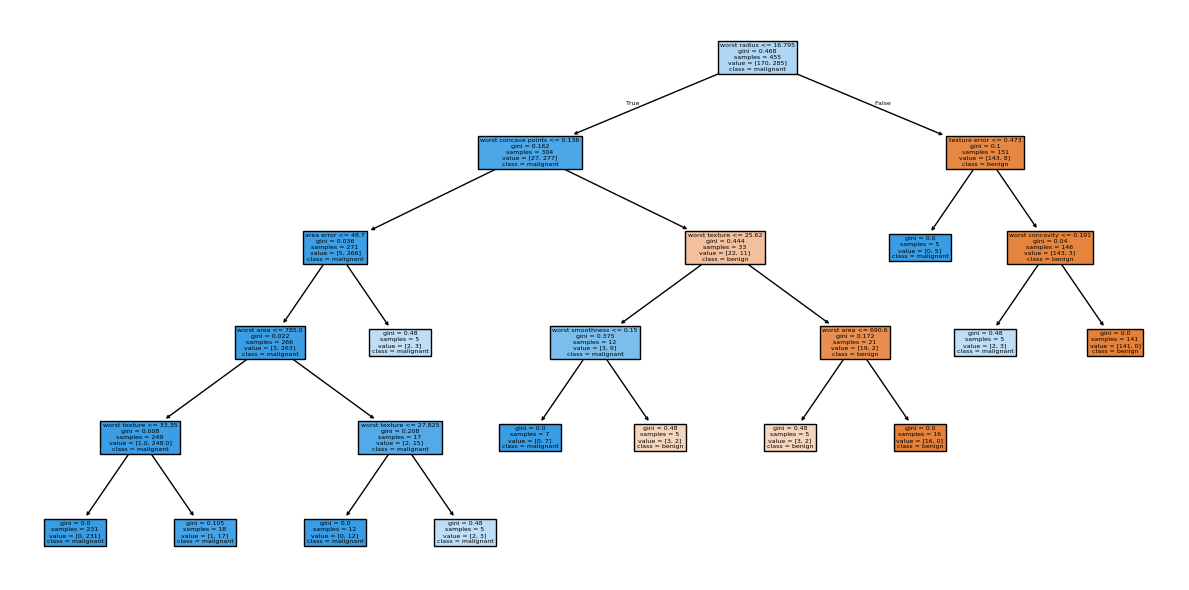

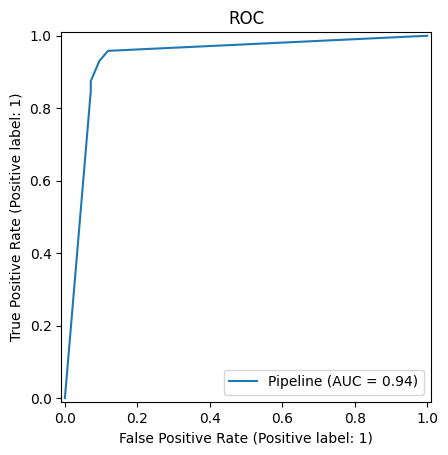

In [ ]:
# TODO: Visualiser l'arbre et la ROC
best_tree = best.named_steps["tree"]
plt.figure(figsize=(12,6))
plot_tree(best_tree, feature_names=X.columns, class_names=["benign","malignant"], filled=True)
plt.tight_layout(); plt.show()

RocCurveDisplay.from_estimator(best, Xte, yte)
plt.title("ROC")
print ("\n")
plt.show()


###Interpretation de la courbe ROC:
On trace la diagonal imaginaire
 - Si la courbe est proche de la diagonal = model aléatoire, aucune capacité de discrimination
- Si la courbe monte rapidement en haut à gauche = bon modele de classification, forte sencibilité et peu de faux positif
 - Si le taux de faux positif nul et le taux de vrai positif vaut 1 alors on a la point parfait

AUC compris entre 0 et 1 et c'est l'air sous la courbe ROC. plus l'AUC est grand et meilleur est le modele

### ✅ À retenir
- Ajuster la complexité (profondeur, min_samples_leaf, ccp_alpha).
- En santé, **Recall** prime souvent, mais surveiller Precision.
